In [1]:
#TP 3 GRUPO 7
#DOLIMPIO - FEIJOO - RUDI

In [ ]:
#DOLIMPIO PARTE I

In [1]:
# ============================
# 0. LIBRERÍAS
# ============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ============================
# 1.1. CARGAR BASE PANEL LIMPIA
# ============================

# Ruta al panel limpio (o la ruta donde tengamos el archivo)
path_panel = r"C:\Users\gasto\Desktop\Taller de Programación\TP3\panel_patagonia_T1_2005_2025_limpio.xlsx"

df_panel = pd.read_excel(path_panel)
df_panel.columns = df_panel.columns.str.upper().str.strip()

print(df_panel.head())
print(df_panel.columns)

     CODUSU  NRO_HOGAR  ANO4  CH04  CH06  CH07  CH08  CH12  CH13  CH14  ...  \
0  125814            1  2005     1    46     2     1     4     2   2.0  ...   
1  125814            1  2005     2    32     2     1     4     2   2.0  ...   
2  125814            1  2005     1    14     5     1     3     2   7.0  ...   
3  125814            1  2005     1     9     5     1     3     2   4.0  ...   
4  125814            1  2005     2     3     5     1     0     0   NaN  ...   

   PP3F_TOT  NIVEL_ED  ESTADO  CAT_INAC   IPCF  PP04A  PONDERA  \
0       0.0         3       1         0  480.0    2.0      249   
1       0.0         3       3         4  480.0    0.0      249   
2       0.0         2       3         3  480.0    0.0      249   
3       0.0         1       4         3  480.0    0.0      249   
4       0.0         7       4         5  480.0    0.0      249   

   PP3F_TOT_LIMPIO  TRIMESTRE  PERIODO  
0              0.0        NaN  T1-2005  
1              0.0        NaN  T1-2005  
2    

In [3]:
# ============================
# 1.2. CARGAR TABLA ADULTO EQUIVALENTE
# ============================

# Ruta a tabla AE (o la ruta donde tengamos el archivo)
path_ae = r"C:\Users\gasto\Desktop\Taller de Programación\TP1\tabla_adulto_equiv.xlsx"

ae_raw = pd.read_excel(path_ae)

# La parte útil arranca en la fila 4
age_df = ae_raw.iloc[3:, :].copy()
age_df.columns = ["Edad", "Mujeres", "Varones"]

# Filas con edad y coeficiente
age_df = age_df[age_df["Edad"].notna() & age_df["Mujeres"].notna()]

print("Tabla de factores (edad-rango, mujeres, varones):")
print(age_df.head(10))

Tabla de factores (edad-rango, mujeres, varones):
              Edad Mujeres Varones
4   Menor de 1 año    0.35    0.35
5             1año    0.37    0.37
6           2 años    0.46    0.46
7           3 años    0.51    0.51
8           4 años    0.55    0.55
9           5 años     0.6     0.6
10          6 años    0.64    0.64
11          7 años    0.66    0.66
12          8 años    0.68    0.68
13          9 años    0.69    0.69


In [4]:
# ============================
# 1.3. TABLA DE FACTORES (FORMATO LARGO)
# ============================

df_factores_long = age_df.melt(
    id_vars=['Edad'],
    value_vars=['Mujeres', 'Varones'],
    var_name='Genero_Factor',
    value_name='Factor_Ajuste'
)

df_factores_long = df_factores_long.rename(columns={'Edad': 'Edad_Factor'})

# Codificar sexo: 1 varón, 2 mujer
mapeo_genero = {'Varones': 1, 'Mujeres': 2}
df_factores_long['Genero_Codificado'] = df_factores_long['Genero_Factor'].map(mapeo_genero)

df_factores_long['Factor_Ajuste'] = pd.to_numeric(df_factores_long['Factor_Ajuste'], errors='coerce')

print(df_factores_long.head(10))

      Edad_Factor Genero_Factor  Factor_Ajuste  Genero_Codificado
0  Menor de 1 año       Mujeres           0.35                  2
1            1año       Mujeres           0.37                  2
2          2 años       Mujeres           0.46                  2
3          3 años       Mujeres           0.51                  2
4          4 años       Mujeres           0.55                  2
5          5 años       Mujeres           0.60                  2
6          6 años       Mujeres           0.64                  2
7          7 años       Mujeres           0.66                  2
8          8 años       Mujeres           0.68                  2
9          9 años       Mujeres           0.69                  2


In [5]:
# ============================
# 1.4. CLASIFICAR EDAD EN RANGOS
# ============================

def clasificar_edad(edad):
    if pd.isna(edad):
        return np.nan
    if edad < 1:
        return 'Menor de 1 año'
    elif edad == 1:
        return '1año'
    elif edad == 2:
        return '2 años'
    elif edad == 3:
        return '3 años'
    elif edad == 4:
        return '4 años'
    elif edad == 5:
        return '5 años'
    elif edad == 6:
        return '6 años'
    elif edad == 7:
        return '7 años'
    elif edad == 8:
        return '8 años'
    elif edad == 9:
        return '9 años'
    elif edad == 10:
        return '10 años'
    elif edad == 11:
        return '11 años'
    elif edad == 12:
        return '12 años'
    elif edad == 13:
        return '13 años'
    elif edad == 14:
        return '14 años'
    elif edad == 15:
        return '15 años'
    elif edad == 16:
        return '16 años'
    elif edad == 17:
        return '17 años'
    elif 18 <= edad <= 29:
        return '18 a 29 años'
    elif 30 <= edad <= 45:
        return '30 a 45 años'
    elif 46 <= edad <= 60:
        return '46 a 60 años'
    elif 61 <= edad <= 75:
        return '61 a 75 años'
    elif edad > 75:
        return 'más de 75 años'
    else:
        return np.nan

df_panel['CH06'] = pd.to_numeric(df_panel['CH06'], errors='coerce')  # edad
df_panel['CH04'] = pd.to_numeric(df_panel['CH04'], errors='coerce')  # sexo

df_panel['EDAD_RANGO'] = df_panel['CH06'].apply(clasificar_edad)

print(df_panel['EDAD_RANGO'].value_counts(dropna=False).head(20))

EDAD_RANGO
30 a 45 años      2032
18 a 29 años      1473
46 a 60 años      1433
61 a 75 años       946
más de 75 años     309
17 años            181
12 años            174
15 años            166
10 años            166
14 años            157
9 años             154
13 años            150
11 años            145
7 años             139
16 años            134
6 años             125
4 años             125
5 años             118
8 años             109
3 años             103
Name: count, dtype: int64


In [6]:
# ============================
# 1.5. FACTOR AJUSTE POR INDIVIDUO Y HOGAR
# ============================

df_merge = df_panel.merge(
    df_factores_long,
    left_on=['EDAD_RANGO', 'CH04'],
    right_on=['Edad_Factor', 'Genero_Codificado'],
    how='left'
)

print(df_merge[['CH06', 'EDAD_RANGO', 'CH04', 'Factor_Ajuste']].head())
print("Porcentaje de NaN en Factor_Ajuste:", df_merge['Factor_Ajuste'].isna().mean())

# ID de hogar
df_merge['CODUSU'] = df_merge['CODUSU'].astype(str).str.strip()
df_merge['NRO_HOGAR'] = df_merge['NRO_HOGAR'].astype(str).str.strip()
df_merge['ID_HOGAR'] = df_merge['CODUSU'] + "_" + df_merge['NRO_HOGAR']

# Sumar factor por hogar
df_sumas = (
    df_merge
    .groupby('ID_HOGAR')['Factor_Ajuste']
    .sum()
    .reset_index()
    .rename(columns={'Factor_Ajuste': 'Factor_Ajuste_hogar'})
)

df = df_merge.merge(df_sumas, on='ID_HOGAR', how='left')

   CH06    EDAD_RANGO  CH04  Factor_Ajuste
0    46  46 a 60 años     1           1.00
1    32  30 a 45 años     2           0.77
2    14       14 años     1           0.96
3     9        9 años     1           0.69
4     3        3 años     2           0.51
Porcentaje de NaN en Factor_Ajuste: 0.0


In [7]:
# ============================
# 1.6. CÁLCULO DE POBREZA Y RESPONDIERON / NORESPONDIERON
# ============================

# Año e ITF
df['ANIO'] = pd.to_numeric(df.get('ANIO', df.get('ANO4')), errors='coerce').astype('Int64')
df['ITF'] = pd.to_numeric(df['ITF'], errors='coerce')
df['Factor_Ajuste_hogar'] = pd.to_numeric(df['Factor_Ajuste_hogar'], errors='coerce')

# CBT T1 por adulto equivalente (promedios trimestrales)
CBT_T1_2005 = np.mean([241.23, 246.13, 250.07])
CBT_T1_2025 = np.mean([334535.80, 342370.04, 356073.46])

cbt_dict = {2005: CBT_T1_2005, 2025: CBT_T1_2025}

df['CBT_T1'] = df['ANIO'].map(cbt_dict)
df['INGRESO_NECESARIO'] = df['Factor_Ajuste_hogar'] * df['CBT_T1']

# Variable de pobreza
df['POBRE'] = np.where(df['ITF'] < df['INGRESO_NECESARIO'], 1, 0)

# Flag de respuesta de ITF
df['RESPONDIO_ITF'] = np.where(df['ITF'] > 0, 1, 0)

print(df[['ANIO','ITF','Factor_Ajuste_hogar','CBT_T1','INGRESO_NECESARIO','POBRE','RESPONDIO_ITF']].head())
print("Tasa de pobreza global:", df['POBRE'].mean())

   ANIO   ITF  Factor_Ajuste_hogar  CBT_T1  INGRESO_NECESARIO  POBRE  \
0  2005  2400                 3.93  245.81           966.0333      0   
1  2005  2400                 3.93  245.81           966.0333      0   
2  2005  2400                 3.93  245.81           966.0333      0   
3  2005  2400                 3.93  245.81           966.0333      0   
4  2005  2400                 3.93  245.81           966.0333      0   

   RESPONDIO_ITF  
0              1  
1              1  
2              1  
3              1  
4              1  
Tasa de pobreza global: 0.31772181689809365


In [8]:
# ============================
# 1.7. RESPONDIERON / NORESPONDIERON, SEPARAR POR AÑO Y GUARDAR CSV
# ============================

respondieron = df[df['RESPONDIO_ITF'] == 1].copy()
norespondieron = df[df['RESPONDIO_ITF'] == 0].copy()

respondieron_2005 = respondieron[respondieron['ANIO'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['ANIO'] == 2025].copy()

norespondieron_2005 = norespondieron[norespondieron['ANIO'] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron['ANIO'] == 2025].copy()

print("Respondieron 2005:", respondieron_2005.shape)
print("Respondieron 2025:", respondieron_2025.shape)
print("No respondieron 2005:", norespondieron_2005.shape)
print("No respondieron 2025:", norespondieron_2025.shape)

# Guardar base limpia completa para compartir
path_csv_salida = r"C:\Users\gasto\Desktop\Taller de Programación\TP3\panel_tp3_limpio_con_pobreza.csv"  # (o la ruta donde tengamos el archivo)
df.to_csv(path_csv_salida, index=False)
print("CSV guardado en:", path_csv_salida)

Respondieron 2005: (3150, 34)
Respondieron 2025: (4134, 34)
No respondieron 2005: (22, 34)
No respondieron 2025: (1192, 34)
CSV guardado en: C:\Users\gasto\Desktop\Taller de Programación\TP3\panel_tp3_limpio_con_pobreza.csv


In [12]:
# ============================
# 2.1. CONSTRUIR X e y PARA EL MODELO (VERSIÓN NUMÉRICA)
# ============================

def construir_X(df_in):
    df_loc = df_in.copy()

    # Variable objetivo (usamos 'pobre' en minúsculas a partir de 'POBRE')
    if 'pobre' not in df_loc.columns:
        df_loc['pobre'] = df_loc['POBRE']

    # Sexo: 1 varón, 0 mujer
    df_loc['sexo'] = df_loc['CH04'].map({1: 1, 2: 0})

    # Edad
    df_loc['edad'] = pd.to_numeric(df_loc['CH06'], errors='coerce')

    # Estado civil en pareja (CH07)
    df_loc['en_pareja'] = df_loc['CH07'].map({
        1: 1,  # Casado
        2: 1,  # Unido
        3: 0,  # Separado/divorciado
        4: 0,  # Viudo
        5: 0   # Soltero
    })

    # Solo salud pública (CH08)
    df_loc['solo_salud_publica'] = df_loc['CH08'].map({
        3: 1,  # Planes públicos
        4: 1   # No paga ni le descuentan
    }).fillna(0)

    # Condición de actividad (ESTADO) como dummies
    df_loc['ESTADO'] = pd.to_numeric(df_loc['ESTADO'], errors='coerce')
    dummies_estado = pd.get_dummies(df_loc['ESTADO'], prefix='estado')
    df_loc = pd.concat([df_loc, dummies_estado], axis=1)

    # Selección de columnas explicativas
    x_cols = ['sexo', 'edad', 'en_pareja', 'solo_salud_publica'] + \
             [c for c in df_loc.columns if c.startswith('estado_')]

    # Forzar todo a numérico y limpiar filas con NaN
    X_raw = df_loc[x_cols].apply(pd.to_numeric, errors='coerce')
    y_raw = pd.to_numeric(df_loc['pobre'], errors='coerce')

    datos = pd.concat([X_raw, y_raw], axis=1).dropna()
    X = datos[x_cols]
    y = datos['pobre'].astype(int)

    return X, y

In [13]:
# ============================
# 2.2. TRAIN / TEST SPLIT Y DIFERENCIA DE MEDIAS (2025)
# ============================

# Base 2025: respondieron con ITF y pobreza calculada
X_2025, y_2025 = construir_X(respondieron_2025)

X_train_2025, X_test_2025, y_train_2025, y_test_2025 = train_test_split(
    X_2025, y_2025, test_size=0.30, random_state=444
)

def tabla_diff_medias(X_train, X_test):
    train_means = X_train.mean()
    test_means = X_test.mean()
    diff = test_means - train_means
    out = pd.concat([train_means, test_means, diff], axis=1)
    out.columns = ['media_train', 'media_test', 'diff_test_minus_train']
    return out

tabla_diff_2025 = tabla_diff_medias(X_train_2025, X_test_2025)
tabla_diff_2025

,media_train,media_test,diff_test_minus_train
sexo,0.494297,0.489927,-0.004369
edad,38.019011,37.460919,-0.558093
en_pareja,0.377809,0.376309,-0.001499
solo_salud_publica,0.208434,0.203868,-0.004566
estado_1,0.428275,0.452861,0.024585
estado_2,0.023851,0.024980,0.001129
estado_3,0.445558,0.433521,-0.012037
estado_4,0.102316,0.088638,-0.013678


In [14]:
# ============================
# 3.1. ESTIMACIÓN DEL MODELO LOGIT (2025)
# ============================

# Agregamos constante
X_train_2025_sm = sm.add_constant(X_train_2025)

# Nos aseguramos de que todo sea float
X_train_2025_sm = X_train_2025_sm.astype(float)
y_train_2025_num = y_train_2025.astype(float)

logit_model_2025 = sm.Logit(y_train_2025_num, X_train_2025_sm)
res_logit_2025 = logit_model_2025.fit()

print(res_logit_2025.summary())

Optimization terminated successfully.
         Current function value: 0.419202
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  pobre   No. Observations:                 2893
Model:                          Logit   Df Residuals:                     2885
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                  0.1594
Time:                        14:54:11   Log-Likelihood:                -1212.8
converged:                       True   LL-Null:                       -1442.7
Covariance Type:            nonrobust   LLR p-value:                 3.457e-95
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9753        nan        nan        nan         nan         nan
sexo 

In [15]:
# ============================
# 3.2. TABLA COEFICIENTES, ERRORES ESTÁNDAR Y ODDS RATIOS
# ============================

coef = res_logit_2025.params
se = res_logit_2025.bse
odds = np.exp(coef)

tabla_logit_2025 = pd.DataFrame({
    "coef": coef,
    "std_error": se,
    "odds_ratio": odds
})

tabla_logit_2025

,coef,std_error,odds_ratio
const,-0.975285,NaN,0.377085
sexo,-0.091575,0.103693,0.912493
edad,-0.018805,0.003081,0.981371
en_pareja,0.129209,0.130539,1.137928
solo_salud_publica,1.758720,0.110337,5.804999
estado_1,-0.832527,NaN,0.434949
estado_2,-0.101013,NaN,0.903921
estado_3,0.060336,NaN,1.062194
estado_4,-0.102081,NaN,0.902956


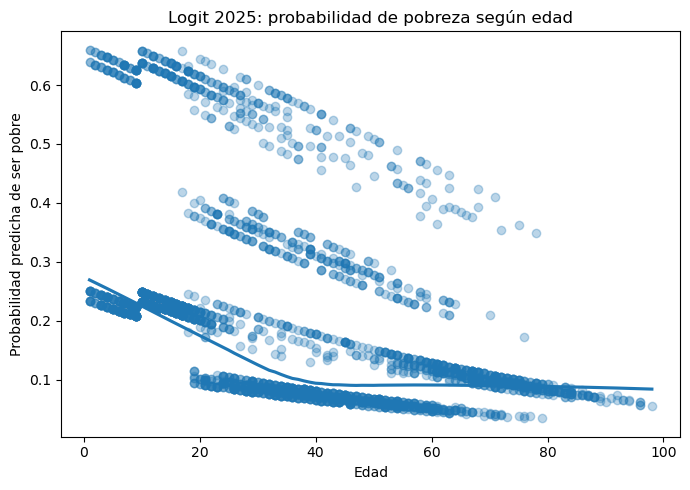

In [16]:
# ============================
# 3.3. GRÁFICO PROBABILIDAD PREDICHA SEGÚN EDAD (2025)
# ============================

yhat_train_2025 = res_logit_2025.predict(X_train_2025_sm)

df_plot = pd.DataFrame({
    "prob_pobre": yhat_train_2025,
    "edad": X_train_2025["edad"]
})

plt.figure(figsize=(7, 5))
sns.regplot(
    data=df_plot,
    x="edad",
    y="prob_pobre",
    lowess=True,
    scatter_kws={"alpha": 0.3}
)
plt.xlabel("Edad")
plt.ylabel("Probabilidad predicha de ser pobre")
plt.title("Logit 2025: probabilidad de pobreza según edad")
plt.tight_layout()
plt.show()

In [ ]:
#RUDI PARTE II

In [ ]:
import pandas as pd

# Cambiá el nombre si tu archivo se llama distinto
df = pd.read_csv(r"C:\Users\feder\Downloads\panel_tp3_limpio_con_pobreza.csv")

df.head()

In [ ]:
df = pd.read_csv("C:/Users/feder/Downloads/panel_tp3_limpio_con_pobreza.csv")
list(df.columns)

In [ ]:
# Filtramos solo quienes respondieron ITF y pertenecen al año 2025
df_2025_itf = df[(df['RESPONDIO_ITF'] == 1) & (df['ANO4'] == 2025)]

df_2025_itf.head()

In [ ]:
# Variable objetivo
y = df_2025_itf["POBRE"]

# Features
features = [
    "CH04", "CH06", "CH07", "CH08", "CH12", "CH13",
    "ITF", "NIVEL_ED", "ESTADO",
    "CAT_INAC", "IPCF"
]

X = df_2025_itf[features]

# Pasamos las categóricas a dummies
cat_cols = ["CH04", "CH07", "CH08", "CH12", "CH13", "NIVEL_ED", "ESTADO", "CAT_INAC"]

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=123,
    stratify=y
)

In [ ]:
features = [
    "CH04", "CH06", "CH07", "CH08", "CH12", "CH13",
    "ITF", "NIVEL_ED", "ESTADO",
    "CAT_INAC", "IPCF"
]

df_2025_itf = df[(df["ANIO"] == 2025) & (df["RESPONDIO_ITF"] == 1)].copy()

df_2025_itf[features].isna().sum().sort_values(ascending=False)

In [ ]:
import pandas as pd

# Base filtrada 2025 + respondieron ITF
df_2025_itf = df[(df["ANIO"] == 2025) & (df["RESPONDIO_ITF"] == 1)].copy()

# Usamos solo las features elegidas + POBRE, y nos quedamos con casos completos
df_knn = df_2025_itf[features + ["POBRE"]].dropna()

print("Filas luego de dropna:", df_knn.shape[0])

In [ ]:
y = df_knn["POBRE"]
X = df_knn[features]

cat_cols = ["CH04", "CH07", "CH08", "CH12", "CH13", "NIVEL_ED", "ESTADO", "CAT_INAC"]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=123,
    stratify=y
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks = [1, 5, 10]

for k in Ks:
    knn_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

    knn_pipe.fit(X_train, y_train)
    y_pred = knn_pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} | Accuracy en test: {acc:.3f}")

In [ ]:
# Calcular los cuartiles y el IQR para ITF e IPCF
Q1_ITF = X_train["ITF"].quantile(0.25)
Q3_ITF = X_train["ITF"].quantile(0.75)
IQR_ITF = Q3_ITF - Q1_ITF

Q1_IPCF = X_train["IPCF"].quantile(0.25)
Q3_IPCF = X_train["IPCF"].quantile(0.75)
IQR_IPCF = Q3_IPCF - Q1_IPCF

# Filtrar outliers (quedarnos con los valores dentro del rango intercuartílico)
X_filtered = X_train[((X_train["ITF"] >= (Q1_ITF - 1.5 * IQR_ITF)) & (X_train["ITF"] <= (Q3_ITF + 1.5 * IQR_ITF))) &
                     ((X_train["IPCF"] >= (Q1_IPCF - 1.5 * IQR_IPCF)) & (X_train["IPCF"] <= (Q3_IPCF + 1.5 * IQR_IPCF)))]

# Filtrar también las etiquetas (y_train)
y_filtered = y_train[X_filtered.index]

print(f"Filas antes de eliminar outliers: {X_train.shape[0]}")
print(f"Filas después de eliminar outliers: {X_filtered.shape[0]}")

In [ ]:
# Usamos el mismo proceso para graficar después de filtrar los outliers
X_train_subset_filtered = X_filtered[["ITF", "IPCF"]]  # Variables numéricas sin outliers
y_train_subset_filtered = y_filtered

# Creamos el escalador y escalamos X_train_filtered
scaler = StandardScaler()
X_train_scaled_filtered = scaler.fit_transform(X_train_subset_filtered)

# Definimos los valores de K para los que vamos a graficar
Ks = [1, 10]

# Configuración del layout con GridSpec para ajustar la barra de color en el centro
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.05, 1])  # 3 columnas, la del medio será para la barra de color

# Gráficos de KNN
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[2])

# Para cada valor de K
for i, k in enumerate(Ks):
    ax = ax0 if i == 0 else ax1  # Elegimos el gráfico según el valor de K
    # Creamos el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_filtered, y_train_subset_filtered)

    # Definimos el grid para el gráfico (las "fronteras de decisión")
    h = .02  # tamaño de los pasos en el grid
    x_min, x_max = X_train_scaled_filtered[:, 0].min() - 1, X_train_scaled_filtered[:, 0].max() + 1
    y_min, y_max = X_train_scaled_filtered[:, 1].min() - 1, X_train_scaled_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecimos las probabilidades sobre el grid de puntos
    Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Usamos la probabilidad de la clase 1 ("pobre")
    Z = Z.reshape(xx.shape)

    # Dibujamos la frontera de decisión (ahora con probabilidad continua)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm, levels=np.linspace(0, 1, 50))
    
    # Dibujamos los puntos de entrenamiento
    scatter = ax.scatter(X_train_scaled_filtered[:, 0], X_train_scaled_filtered[:, 1], c=y_train_subset_filtered, 
                         cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    
    # Configuramos el gráfico
    ax.set_title(f"KNN con K={k}")
    ax.set_xlabel("ITF (Escalado)")
    ax.set_ylabel("IPCF (Escalado)")
    ax.set_xticks(())
    ax.set_yticks(())

# Añadimos la barra de colores en el centro
cbar_ax = plt.subplot(gs[1])  # La columna del medio
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Probabilidad de ser Pobre")

plt.tight_layout()  # Ajustamos el layout para que no se solapen
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Definimos los valores de K para los que vamos a realizar la validación cruzada
K_values = [1, 10]

# Creamos el escalador y escalamos X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)  # X_train_subset es el conjunto sin outliers
y_train_subset = y_train  # Etiquetas

# Lista para almacenar el accuracy promedio de cada K
mean_accuracies = []

# Aplicamos validación cruzada (5-fold) para cada valor de K
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Realizamos la validación cruzada y calculamos el accuracy promedio
    cv_scores = cross_val_score(knn, X_train_scaled, y_train_subset, cv=5, scoring='accuracy')
    mean_accuracies.append(np.mean(cv_scores))  # Guardamos el accuracy promedio

# Graficamos el accuracy promedio para cada K
plt.figure(figsize=(8, 6))
plt.plot(K_values, mean_accuracies, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Accuracy Promedio por Cross-Validation para KNN')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Accuracy Promedio')
plt.xticks(K_values)
plt.grid(True)
plt.show()

# Mostramos el K óptimo
optimal_k = K_values[np.argmax(mean_accuracies)]
print(f"El K óptimo por Cross-Validation es: K={optimal_k}")

In [ ]:
#FEIJOO PARTE III

In [ ]:
# librerias con las que se va a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
conteo_itf_cero = (df['ITF'] == 0).sum()
print(f"El número de observaciones con ITF = 0 en df es: {conteo_itf_cero}")

# Filtramos solo quienes respondieron ITF y pertenecen al año 2025
df_2025_itf = df[(df['RESPONDIO_ITF'] == 1) & (df['ANO4'] == 2025)]
df_2025_itf.head()

# Calcular los cuartiles y el IQR para ITF e IPCF
Q1_ITF = df_2025_itf["ITF"].quantile(0.25)
Q3_ITF = df_2025_itf["ITF"].quantile(0.75)
IQR_ITF = Q3_ITF - Q1_ITF

Q1_IPCF = df_2025_itf["IPCF"].quantile(0.25)
Q3_IPCF = df_2025_itf["IPCF"].quantile(0.75)
IQR_IPCF = Q3_IPCF - Q1_IPCF

# Filtrar outliers (quedarnos con los valores dentro del rango intercuartílico)
df_2025_itf_filtered = df_2025_itf[((df_2025_itf["ITF"] >= (Q1_ITF - 1.5 * IQR_ITF)) & (df_2025_itf["ITF"] <= (Q3_ITF + 1.5 * IQR_ITF))) &
                                   ((df_2025_itf["IPCF"] >= (Q1_IPCF - 1.5 * IQR_IPCF)) & (df_2025_itf["IPCF"] <= (Q3_IPCF + 1.5 * IQR_IPCF)))]

print(f"Filas antes de eliminar outliers: {df_2025_itf.shape[0]}")
print(f"Filas después de eliminar outliers: {df_2025_itf_filtered.shape[0]}")

# Usamos el mismo proceso para graficar después de filtrar los outliers
df_2025_itf_subset_filtered = df_2025_itf_filtered  # Variables numéricas sin outliers

In [ ]:
df_2025_itf_subset_filtered.head()

# Variable objetivo
y = df_2025_itf_subset_filtered["POBRE"]

# Features
features = [
    "CH04", "CH06", "CH07", "CH08", "CH12", "CH13", "NIVEL_ED", "ESTADO",
    "CAT_INAC", "ITF", "IPCF"
]

X = df_2025_itf_subset_filtered[features]

# Pasamos las categóricas a dummies
cat_cols = ["CH04", "CH07", "CH08", "CH12", "CH13", "NIVEL_ED", "ESTADO", "CAT_INAC"]

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=444,
    stratify=y
)

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logit_model = LogisticRegression(
    random_state=444, 
    max_iter=1000, 
    solver='liblinear' #para datasets pequeños
)

# 2. Entrenar el modelo con los datos de entrenamiento
print("Entrenando el modelo...")
logit_model.fit(X_train, y_train)
print("¡Entrenamiento finalizado!")

# 3. Realizar predicciones sobre el conjunto de prueba (X_test)
y_pred = logit_model.predict(X_test)

# Reporte de clasificación
print("\n## 📋 Reporte de Clasificación")
print(classification_report(y_test, y_pred))

# Precisión general del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy) del Modelo: {accuracy:.4f}")

In [ ]:
# Definimos los valores de K para los que vamos a realizar la validación cruzada
K_values = [1, 10]

# Creamos el escalador y escalamos X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_train_subset es el conjunto sin outliers
y_train_subset = y_train  # Etiquetas

# Lista para almacenar el accuracy promedio de cada K
mean_accuracies = []

# Aplicamos validación cruzada (5-fold) para cada valor de K
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Realizamos la validación cruzada y calculamos el accuracy promedio
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies.append(np.mean(cv_scores))  # Guardamos el accuracy promedio

# Graficamos el accuracy promedio para cada K
plt.figure(figsize=(8, 6))
plt.plot(K_values, mean_accuracies, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Accuracy Promedio por Cross-Validation para KNN')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Accuracy Promedio')
plt.xticks(K_values)
plt.grid(True)
plt.show()

# Mostramos el K óptimo
optimal_k = K_values[np.argmax(mean_accuracies)]
print(f"El K óptimo por Cross-Validation es: K={optimal_k}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# El K óptimo que determinaste
K_OPTIMO = 1

# 1. Escalar el conjunto de prueba (X_test)
# ¡CRUCIAL! Se aplica el mismo 'scaler' ajustado en el entrenamiento, usando solo .transform()
X_test_scaled = scaler.transform(X_test)

# 2. Inicializar y Entrenar el modelo KNN con K=1
knn_model_optimo = KNeighborsClassifier(n_neighbors=K_OPTIMO)

print(f"Entrenando el modelo KNN con K={K_OPTIMO}...")
# Usamos los datos de entrenamiento ya escalados (X_train_scaled)
knn_model_optimo.fit(X_train_scaled, y_train_subset)
print("¡Entrenamiento finalizado!")

# 3. Realizar predicciones sobre el conjunto de prueba escalado
y_pred_optimo = knn_model_optimo.predict(X_test_scaled)

# 4. Generar la Matriz de Confusión
cm_optimo = confusion_matrix(y_test, y_pred_optimo)

print("\n## 🔳 Matriz de Confusión para KNN (K=1)")
print("Predicciones vs. Valores Reales:")
print(cm_optimo)

# 5. Calcular la Precisión (Accuracy) general
accuracy = accuracy_score(y_test, y_pred_optimo)
print(f"\nPrecisión (Accuracy) en el conjunto de prueba: {accuracy:.4f}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Obtener las probabilidades de predicción para la clase positiva (Clase 1, "Pobre")
# El método predict_proba devuelve las probabilidades para [Clase 0, Clase 1]
# Tomamos solo la columna 1 (probabilidad de ser "Pobre")
y_pred_proba_logit = logit_model.predict_proba(X_test)[:, 1]

# 2. Calcular el Área Bajo la Curva (AUC)
# Esta métrica mide la capacidad discriminatoria del modelo.
roc_auc_logit = roc_auc_score(y_test, y_pred_proba_logit)

print(f"\n## 🔢 Métrica AUC para el Modelo Logit")
print(f"El Área Bajo la Curva (AUC) es: {roc_auc_logit:.4f}")

# 3. Calcular la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y_pred_proba_logit)

In [ ]:
# 1. Obtener las probabilidades de predicción para la clase positiva (Clase 1, "Pobre")
# El método predict_proba devuelve las probabilidades para [Clase 0, Clase 1]
y_pred_proba = knn_model_optimo.predict_proba(X_test_scaled)[:, 1]

# 2. Calcular el Área Bajo la Curva (AUC)
# El AUC indica la capacidad del modelo para distinguir entre clases.
# Un AUC de 1.0 es perfecto; un AUC de 0.5 es aleatorio.
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n## 🔢 Métrica AUC")
print(f"El Área Bajo la Curva (AUC) es: {roc_auc:.4f}")

# 3. Calcular la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
# Esto se hace para diferentes umbrales de clasificación.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. Calcular Métricas para Logit ---
# AUC
roc_auc_logit = roc_auc_score(y_test, y_pred_proba_logit)
# TPR y FPR
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_pred_proba_logit)

# --- 2. Calcular Métricas para KNN ---
# AUC
# Asegúrate de que 'y_pred_proba' (del modelo KNN) está disponible.
roc_auc_knn = roc_auc_score(y_test, y_pred_proba) 
# TPR y FPR
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba) 


print("\n## 🔢 Resultados del AUC")
print(f"AUC Regresión Logística: {roc_auc_logit:.4f}")
print(f"AUC KNN (K=1): {roc_auc_knn:.4f}")


# --- 3. Graficar Ambas Curvas ---
plt.figure(figsize=(10, 8))

# Curva ROC del modelo Logit
plt.plot(fpr_logit, tpr_logit, 
         color='blue', lw=2, 
         label=f'Logit (AUC = {roc_auc_logit:.4f})')

# Curva ROC del modelo KNN
plt.plot(fpr_knn, tpr_knn, 
         color='red', lw=2, 
         linestyle='--',
         label=f'KNN (K=1) (AUC = {roc_auc_knn:.4f})')

# Línea de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle=':', label='Clasificador Aleatorio (0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall')
plt.title('Comparación de Curvas ROC: Logit vs. KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
# Métricas
accuracy_knn = accuracy_score(y_test, y_pred_optimo)
f1_knn = f1_score(y_test, y_pred_optimo)

accuracy_logit = accuracy_score(y_test, y_pred)
f1_logit = f1_score(y_test, y_pred)

# Tabla
tabla_resultados = pd.DataFrame({
    'Modelo': ['KNN (K=1)', 'Logit'],
    'Accuracy': [accuracy_knn, accuracy_logit],
    'F1-Score': [f1_knn, f1_logit]
})

print("\n### 📊 Comparación de Métricas entre KNN y Logit\n")
print(tabla_resultados)

In [ ]:
conteo_itf_cero = (df['ITF'] == 0).sum()
print(f"El número de observaciones con ITF = 0 en df es: {conteo_itf_cero}")

# Filtramos solo quienes respondieron ITF y pertenecen al año 2025
df_2025_itf_no = df[(df['RESPONDIO_ITF'] == 0) & (df['ANO4'] == 2025)]
df_2025_itf_no.head()

# Calcular los cuartiles y el IQR para ITF e IPCF
Q1_ITF = df_2025_itf_no["ITF"].quantile(0.25)
Q3_ITF = df_2025_itf_no["ITF"].quantile(0.75)
IQR_ITF = Q3_ITF - Q1_ITF

Q1_IPCF = df_2025_itf_no["IPCF"].quantile(0.25)
Q3_IPCF = df_2025_itf_no["IPCF"].quantile(0.75)
IQR_IPCF = Q3_IPCF - Q1_IPCF

# Filtrar outliers (quedarnos con los valores dentro del rango intercuartílico)
df_2025_itf_no_filtered = df_2025_itf_no[((df_2025_itf_no["ITF"] >= (Q1_ITF - 1.5 * IQR_ITF)) & (df_2025_itf_no["ITF"] <= (Q3_ITF + 1.5 * IQR_ITF))) &
                                   ((df_2025_itf_no["IPCF"] >= (Q1_IPCF - 1.5 * IQR_IPCF)) & (df_2025_itf_no["IPCF"] <= (Q3_IPCF + 1.5 * IQR_IPCF)))]

print(f"Filas antes de eliminar outliers: {df_2025_itf_no.shape[0]}")
print(f"Filas después de eliminar outliers: {df_2025_itf_no_filtered.shape[0]}")

# Usamos el mismo proceso para graficar después de filtrar los outliers
df_2025_itf_subset_no_filtered = df_2025_itf_no_filtered  # Variables numéricas sin outliers

In [ ]:
df_2025_itf_subset_no_filtered.head()

In [ ]:
columnas_train = X_train.columns
X_no_itf = X_no_itf.reindex(columns=columnas_train, fill_value=0)
X_test_no_itf_scaled = scaler.transform(X_no_itf)

In [ ]:
y_pred_optimo_no_itf = knn_model_optimo.predict(X_test_no_itf_scaled)

In [ ]:
# 1. Obtener el conteo de cada clase predicha
conteo_clases_predichas = pd.Series(y_pred_optimo_no_itf).value_counts()

# 2. Convertir el conteo a un DataFrame para manejar las columnas fácilmente
conteo_df = pd.DataFrame(conteo_clases_predichas).reset_index()
conteo_df.columns = ['Clase', 'Conteo']

# 3. Calcular el Porcentaje
# La suma total es el número total de observaciones en las predicciones
total_observaciones = conteo_df['Conteo'].sum()
# Añadir la nueva columna 'Porcentaje'
conteo_df['Porcentaje'] = (conteo_df['Conteo'] / total_observaciones) * 100

# 4. Formatear y etiquetar para mejor legibilidad
conteo_df['Clase'] = conteo_df['Clase'].map({0: 'No Pobre (0)', 1: 'Pobre (1)'})
conteo_df['Porcentaje'] = conteo_df['Porcentaje'].map('{:.2f}%'.format)

print("## 📊 Distribución y Porcentaje de Predicciones")
print(conteo_df)